In [10]:
import pandas as pd
import geopandas as gp
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [108]:
df_basket = pd.read_csv('T:/dsny/basket_geo/mapexport.csv')

In [110]:
df_basket.head()

OBJECTID BASKET_TYPE        SOURCE_PDF      PAGE_X      PAGE_Y SECTION  \
0         1           R  MN091_2017-03-14  604.645102  351.839104   MN091   
1         2           R  MN091_2017-03-14  634.915748  349.966711   MN091   
2         3           S  MN091_2017-03-14  636.497252  411.711958   MN091   
3         4           S  MN091_2017-03-14  672.773874  168.191049   MN091   
4         5           S  MN091_2017-03-14  724.805595  265.640604   MN091   

         YEAR      POINT_X      POINT_Y  
0  2017-03-14  993915.6943  233278.9421  
1  2017-03-14  994106.0457  233264.7271  
2  2017-03-14  994115.3151  233652.1905  
3  2017-03-14  994346.0663  232120.5969  
4  2017-03-14  994672.1583  232728.0825

In [24]:
len(df)

4642

In [15]:
df_base = gp.read_file('T:/_GRV/Shapefiles/nyu_2451_34565/nyu_2451_34565.shp')

In [111]:
df_basket = gp.GeoDataFrame(df_basket, geometry = gp.points_from_xy(df_basket.POINT_X, df_basket.POINT_Y))

In [112]:
df_basket['YEAR'] = pd.to_datetime(df_basket.YEAR)
df_basket['year'] = df_basket.YEAR.apply(lambda x: x.year)
df_basket['month'] = df_basket.YEAR.apply(lambda x: x.month)
df_basket['day'] = df_basket.YEAR.apply(lambda x: x.day)

(222500, 245000)

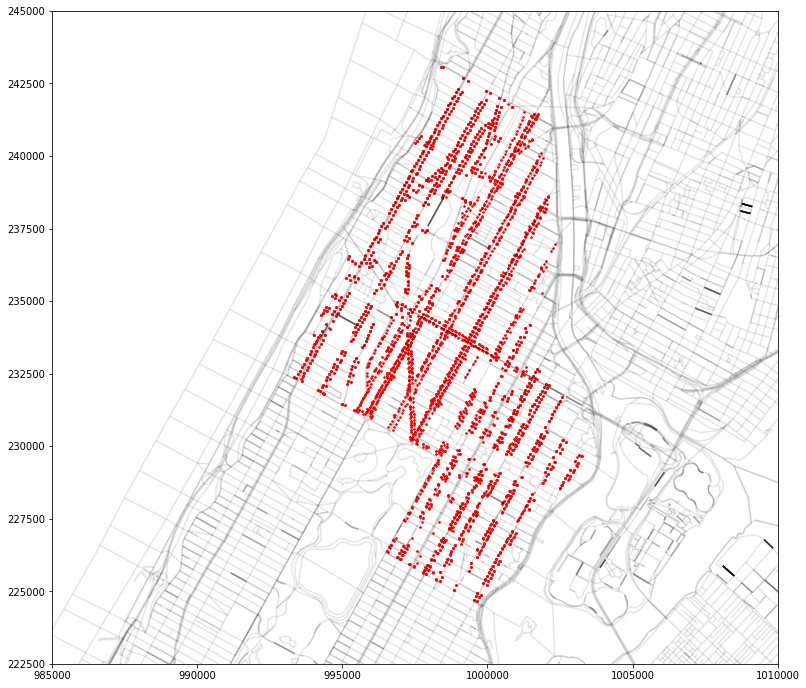

In [22]:
base = df_base.plot(figsize = (13,17), alpha = 0.1, color = 'black')
df.plot(ax = base, marker = '.', color = 'red', markersize = 10)
pl.xlim((985000, 1010000))
pl.ylim((222500, 245000))

In [118]:
df_dirty = pd.read_csv('T:/_311/data/by_complaint_type/dirty_conditions.csv')

In [120]:
df_litter = pd.read_csv('T:/_311/data/by_complaint_type/overflowing_litter_baskets.csv')

In [121]:
df_recycling = pd.read_csv('T:/_311/data/by_complaint_type/overflowing_recycling_baskets.csv')

In [122]:
df_unsanitary = pd.read_csv('T:/_311/data/by_complaint_type/unsanitary_condition.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (11,12,13,14,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [123]:
df_311 = pd.concat([df_dirty, df_litter, df_recycling, df_unsanitary]).reset_index().drop('index', axis=1)

In [124]:
df_311['Created Date'] = pd.to_datetime(df_311['Created Date'])

In [125]:
df_311['year'] = df_311['Created Date'].apply(lambda x: x.year)
df_311['month'] = df_311['Created Date'].apply(lambda x: x.month)
df_311['day'] = df_311['Created Date'].apply(lambda x: x.day)

In [131]:
df_311 = gp.GeoDataFrame(df_311, geometry = gp.points_from_xy(df_311.Longitude, df_311.Latitude))

In [126]:
df_311.groupby(['Complaint Type', 'year']).size()

Complaint Type                 year
Dirty Conditions               2010    35457
                               2011    36926
                               2012    33661
                               2013    33227
                               2014    32630
                               2015    34398
                               2016    33942
                               2017    35887
                               2018    39022
                               2019    24428
Overflowing Litter Baskets     2010     1503
                               2011     1356
                               2012     1164
                               2013     1225
                               2014     1087
                               2015     1563
                               2016     1145
                               2017     1085
                               2018      946
                               2019      461
Overflowing Recycling Baskets  2014       55
                   

In [70]:
pd.DataFrame(df_311[df_311['Complaint Type']=='Overflowing Litter Baskets'].groupby(['year','month']).size(), 
             columns=['freq']).reset_index()

In [91]:
dates = list(map(lambda x, y: str(x)+' '+str(y), df.month, df.year))

In [93]:
len(dates)

115

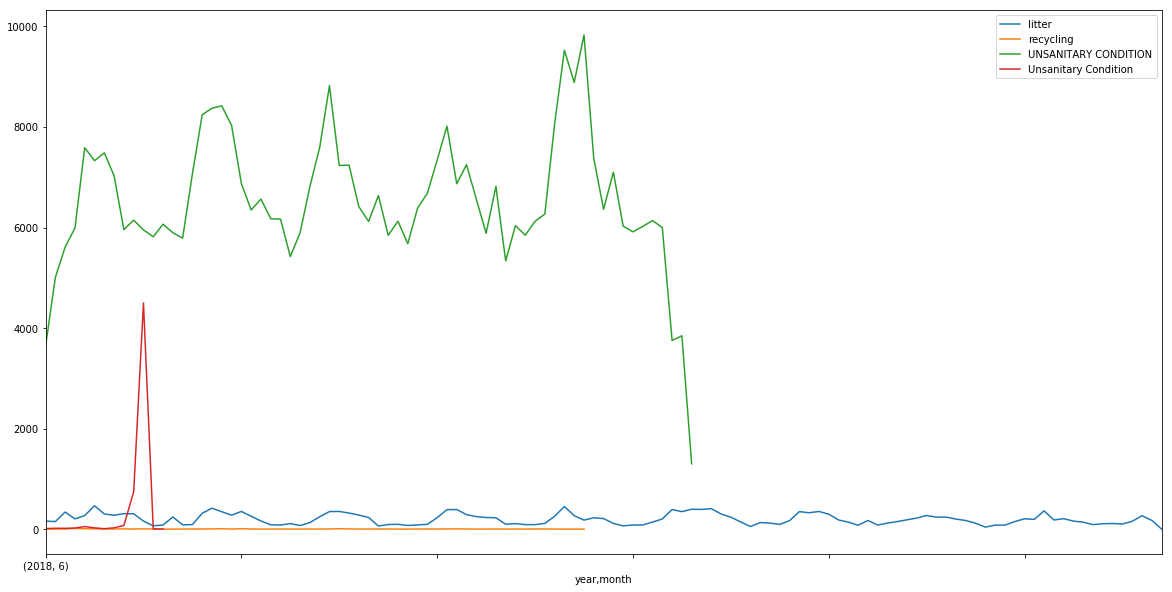

In [100]:
pl.figure(figsize(20,10))
df_311[df_311['Complaint Type']=='Overflowing Litter Baskets'].groupby(['year','month']).size().plot(label='litter')
df_311[df_311['Complaint Type']=='Overflowing Recycling Baskets'].groupby(['year',
                                                                           'month']).size().plot(label='recycling')
df_311[df_311['Complaint Type']=='UNSANITARY CONDITION'].groupby(['year','month']).size().plot(label='UNSANITARY CONDITION')
df_311[df_311['Complaint Type']=='Unsanitary Condition'].groupby(['year','month']).size().plot(label='Unsanitary Condition')
pl.legend()

In [137]:
df = pd.DataFrame(df_311[df_311['Complaint Type']=='UNSANITARY CONDITION'].groupby(['year', 'month']).size(), 
            columns=['freq']).reset_index()

In [150]:
df['label'] = list(map(lambda x, y: str(y)+' '+str(x), df.year, df.month))

In [159]:
len(df.label)

67

In [160]:
len(df.freq.rolling(window=20, center=True).mean())

67

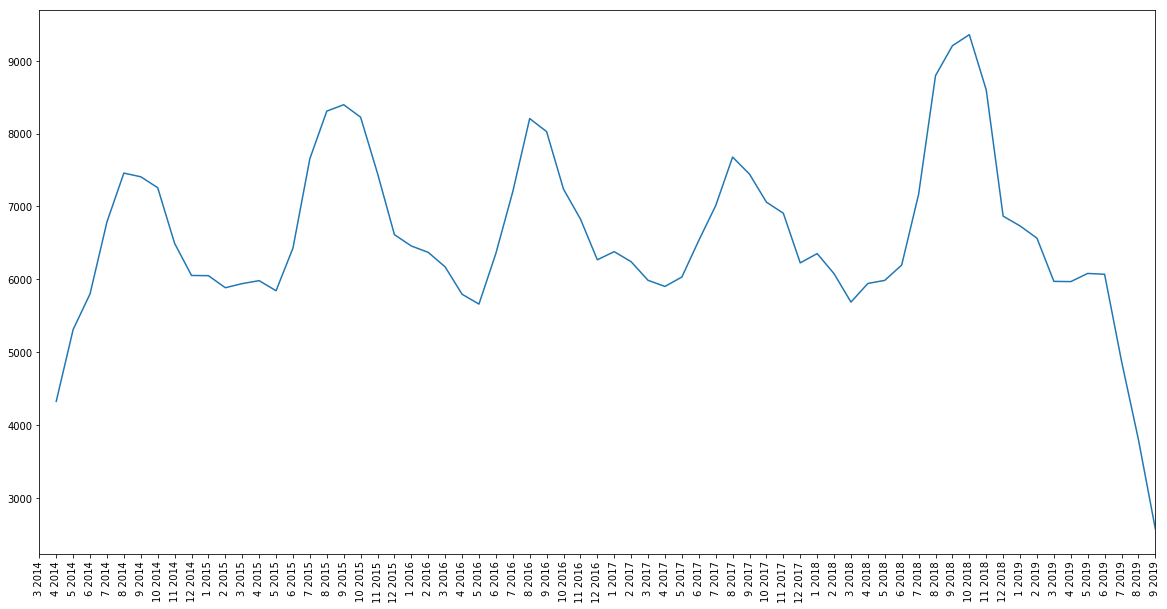

In [167]:
df.freq.rolling(window=3, center=True).mean().plot()
pl.xticks(np.arange(67), df.label, rotation=90);

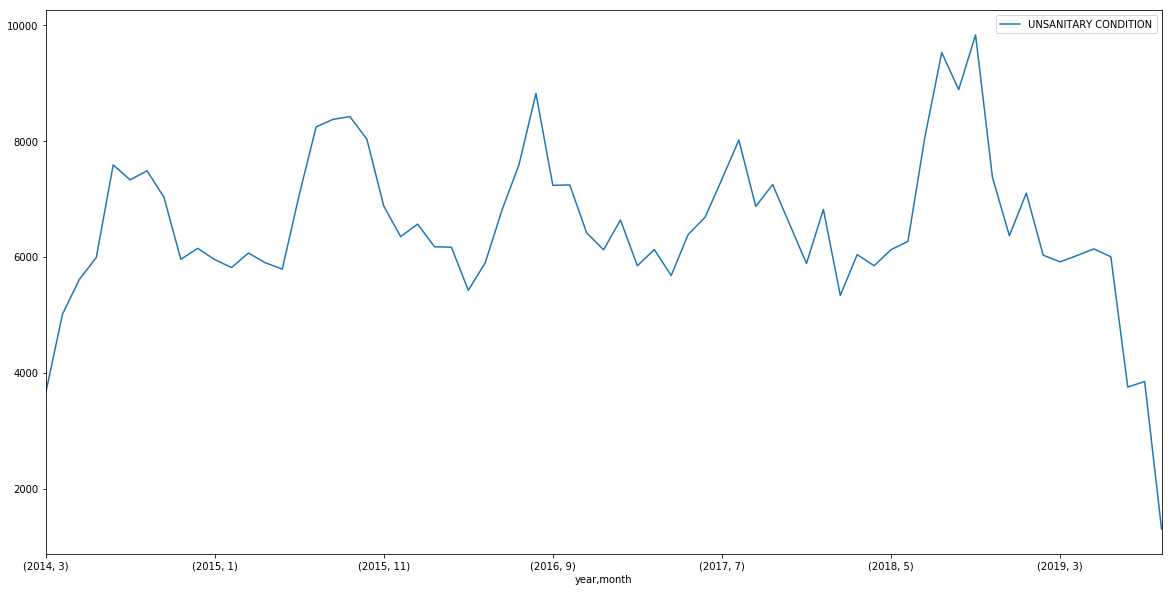

In [127]:
df_311[df_311['Complaint Type']=='UNSANITARY CONDITION'].groupby(['year',
                                                                  'month']).size().plot(label='UNSANITARY CONDITION')
pl.legend()

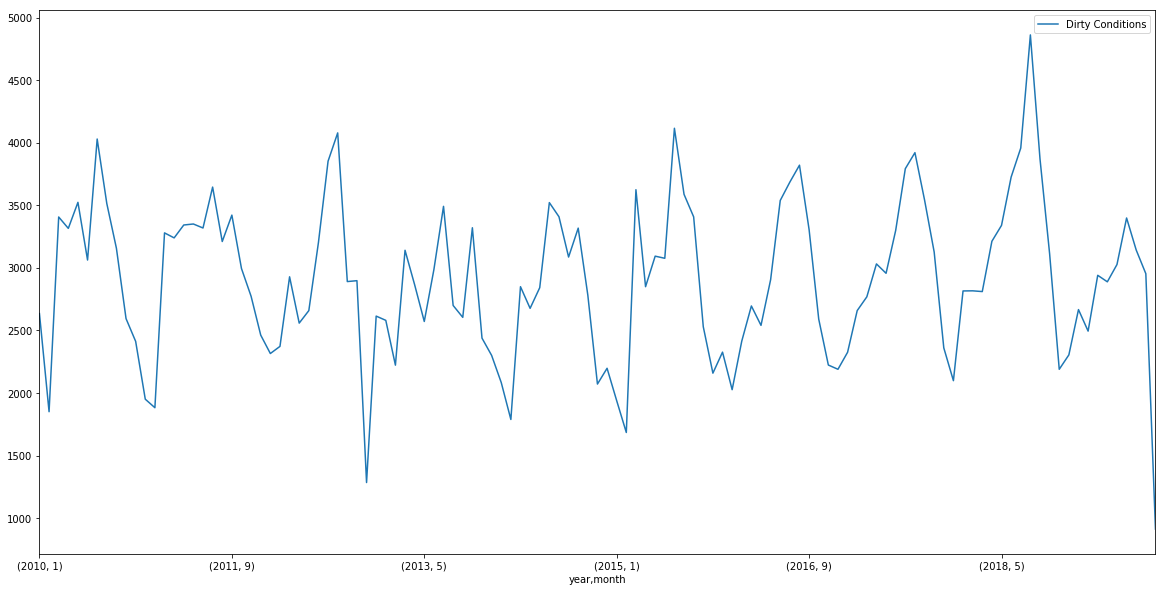

In [128]:
df_311[df_311['Complaint Type']=='Dirty Conditions'].groupby(['year',
                                                       'month']).size().plot(label='Dirty Conditions')
pl.legend()

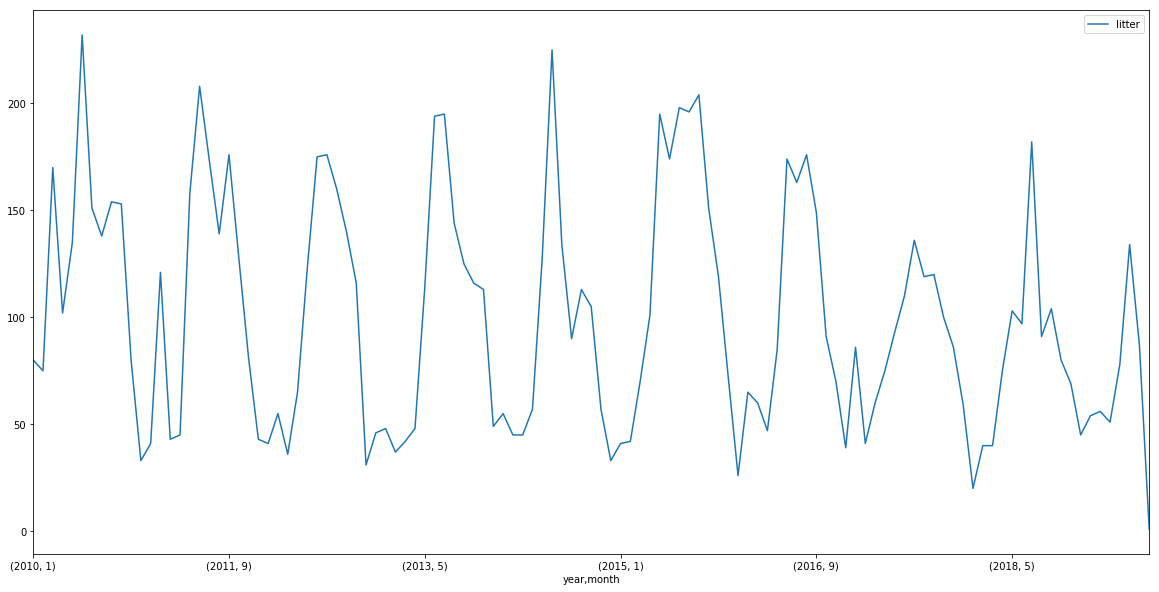

In [132]:
df_311[df_311['Complaint Type']=='Overflowing Litter Baskets'].groupby(['year','month']).size().plot(label='litter')
pl.legend()

In [115]:
df_basket.groupby(['year', 'month', 'day']).size()

year  month  day
2017  3      14     1260
      5      1       505
2018  3      16      494
      5      2       503
      8      21      454
2019  3      25     1426
dtype: int64

In [116]:
df_311[df_311['Complaint Type']=='UNSANITARY CONDITION'].groupby(['year','month']).size()

year  month
2014  3        3640
      4        5009
      5        5612
      6        5989
      7        7588
      8        7329
      9        7487
      10       7029
      11       5959
      12       6147
2015  1        5953
      2        5816
      3        6066
      4        5897
      5        5789
      6        7069
      7        8244
      8        8374
      9        8421
      10       8032
      11       6878
      12       6349
2016  1        6566
      2        6174
      3        6167
      4        5423
      5        5897
      6        6814
      7        7593
      8        8822
               ... 
2017  4        5678
      5        6385
      6        6682
      7        7340
      8        8017
      9        6871
      10       7249
      11       6565
      12       5886
2018  1        6820
      2        5335
      3        6039
      4        5847
      5        6124
      6        6268
      7        8065
      8        9528
      9        8887
      10

In [129]:
df_311.head()

Unique Key        Created Date             Closed Date Agency  \
0    41756905 2019-02-21 09:36:00  02/21/2019 12:00:00 PM   DSNY   
1    34742180 2016-11-08 14:21:00  11/12/2016 12:00:00 PM   DSNY   
2    34985420 2016-12-10 20:17:00  12/16/2016 12:00:00 PM   DSNY   
3    41759187 2019-02-21 10:12:00  02/22/2019 12:00:00 PM   DSNY   
4    41760225 2019-02-21 10:24:00  02/22/2019 12:00:00 PM   DSNY   

                                         Agency Name    Complaint Type  \
0                                      A - Manhattan  Dirty Conditions   
1                                      A - Manhattan  Dirty Conditions   
2                                         A - Queens  Dirty Conditions   
3  A - Illegal Posting Staten Island, Queens and ...  Dirty Conditions   
4                                       A - Brooklyn  Dirty Conditions   

                Descriptor Location Type  Incident Zip      Incident Address  \
0  E11 Litter Surveillance      Sidewalk       10032.0  501 WEST  170 STREET   
1        E3 Dirty Sidewalk      Sidewalk       10035.0   52 EAST  126 STREET   
2  E3A Dirty Area/Alleyway           Lot       11420.0     129-40 134 STREET   
3    E15 Illegal Postering      Sidewalk       11238.0    619 CARLTON AVENUE   
4        E3 Dirty Sidewalk      Sidewalk       11205.0                   NaN   

   ... Bridge Highway Name Bridge Highway Direction Road Ramp  \
0  ...                 NaN                      NaN       NaN   
1  ...                 NaN                      NaN       NaN   
2  ...                 NaN                      NaN       NaN   
3  ...                 NaN                      NaN       NaN   
4  ...                 NaN                      NaN       NaN   

  Bridge Highway Segment   Latitude  Longitude  \
0                    NaN  40.841168 -73.936254   
1                    NaN  40.806243 -73.939792   
2                    NaN  40.671963 -73.804501   
3                    NaN  40.678691 -73.971882   
4                    NaN  40.697716 -73.964874   

                                  Location  year month day  
0  (40.84116810849943, -73.93625441191773)  2019     2  21  
1  (40.80624348544452, -73.93979170285529)  2016    11   8  
2  (40.67196259927289, -73.80450055660583)  2016    12  10  
3   (40.6786907687141, -73.97188226763477)  2019     2  21  
4  (40.69771559277749, -73.96487436006697)  2019     2  21  

[5 rows x 44 columns]

In [171]:
import requests
import geopandas as gpd
from shapely.geometry import shape

r = requests.get("http://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/LION/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=geojson")
r.raise_for_status()

data = r.json()
for d in data:
    d['the_geom'] = shape(d['the_geom'])

gdf = gpd.GeoDataFrame(data).set_geometry('the_geom')
gdf.head()

TypeError: string indices must be integers

In [176]:
data['geometry']

KeyError: 'geometry'

In [189]:
data['features'][1]['geometry']['coordinates']

[[-73.901202101452, 40.8666213684178], [-73.9020747884371, 40.8670073957739]]

In [195]:
LineString?

Object `LineString` not found.


In [186]:
for d in data['features']:
    print(d)
    break

{'type': 'Feature', 'id': 1, 'geometry': {'type': 'LineString', 'coordinates': [[-73.9034682815071, 40.8303620794707], [-73.9023814757185, 40.8296549103045]]}, 'properties': {'OBJECTID': 1, 'Street': 'EAST 168 STREET', 'SAFStreetName': '                                ', 'FeatureTyp': '0', 'SegmentTyp': 'U', 'IncExFlag': ' ', 'RB_Layer': 'B', 'NonPed': ' ', 'TrafDir': 'T', 'TrafSrc': 'DOT', 'SpecAddr': ' ', 'FaceCode': '2510', 'SeqNum': '03070', 'StreetCode': '226700', 'SAFStreetCode': '      ', 'LGC1': '01', 'LGC2': '  ', 'LGC3': '  ', 'LGC4': '  ', 'LGC5': '  ', 'LGC6': '  ', 'LGC7': '  ', 'LGC8': '  ', 'LGC9': '  ', 'BOE_LGC': '1', 'SegmentID': '0078126', 'SegCount': '1', 'LocStatus': 'X', 'LZip': '10456', 'RZip': '10456', 'LBoro': 2, 'RBoro': 2, 'L_CD': '203', 'R_CD': '203', 'LATOMICPOLYGON': '402', 'RATOMICPOLYGON': '101', 'LCT2010': ' 149', 'LCT2010Suf': '  ', 'RCT2010': ' 185', 'RCT2010Suf': '  ', 'LCB2010': '3001', 'LCB2010Suf': ' ', 'RCB2010': '2000', 'RCB2010Suf': ' ', 'LCT20

In [194]:
len(data)

4

In [185]:
data

{'type': 'FeatureCollection',
 'crs': {'type': 'name', 'properties': {'name': 'EPSG:4326'}},
 'properties': {'exceededTransferLimit': True},
 'features': [{'type': 'Feature',
   'id': 1,
   'geometry': {'type': 'LineString',
    'coordinates': [[-73.9034682815071, 40.8303620794707],
     [-73.9023814757185, 40.8296549103045]]},
   'properties': {'OBJECTID': 1,
    'Street': 'EAST 168 STREET',
    'SAFStreetName': '                                ',
    'FeatureTyp': '0',
    'SegmentTyp': 'U',
    'IncExFlag': ' ',
    'RB_Layer': 'B',
    'NonPed': ' ',
    'TrafDir': 'T',
    'TrafSrc': 'DOT',
    'SpecAddr': ' ',
    'FaceCode': '2510',
    'SeqNum': '03070',
    'StreetCode': '226700',
    'SAFStreetCode': '      ',
    'LGC1': '01',
    'LGC2': '  ',
    'LGC3': '  ',
    'LGC4': '  ',
    'LGC5': '  ',
    'LGC6': '  ',
    'LGC7': '  ',
    'LGC8': '  ',
    'LGC9': '  ',
    'BOE_LGC': '1',
    'SegmentID': '0078126',
    'SegCount': '1',
    'LocStatus': 'X',
    'LZip': '1045